# Install all dependancys
* run on local host 


```
jupyter notebook   --NotebookApp.allow_origin='https://colab.research.google.com'   --port=8888   --NotebookApp.port_retries=0

```




In [ ]:
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark3.0.0
!wget -q http://apache.osuosl.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
# unzip it
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
# install findspark 
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.2-bin-hadoop2.7"

In [1]:
import findspark

In [2]:
findspark.init('/home/swarathesh60/spark-2.4.7-bin-hadoop2.7')

In [3]:
from pyspark import SparkContext

In [4]:
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [5]:
from pyspark.streaming import StreamingContext

In [6]:
from pyspark.sql import SparkSession,SQLContext

In [7]:
# spark = SparkSession.builder.appName('Sparksql').getOrCreate()

* we will be working with 2 threads

In [8]:
sc = SparkContext()

In [9]:
ssc = StreamingContext(sc,10)

In [10]:
sqlContext = SQLContext(sc)

* Create a Dstream  with socket
* convert into turrples

In [11]:
socket_stream = ssc.socketTextStream("127.0.0.1",9999)

In [12]:
lines = socket_stream.window(20)

In [13]:
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

In [14]:
# Use Parenthesis for multiple lines or use \.
( lines.flatMap( lambda text: text.split( " " ) ) #Splits to a list
  .filter( lambda word: word.lower().startswith("#") ) # Checks for hashtag calls
  .map( lambda word: ( word.lower(), 1 ) ) # Lower cases the word
  .reduceByKey( lambda a, b: a + b ) # Reduces
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Stores in a Tweet Object
  .foreachRDD( lambda rdd: rdd.toDF().sort( ("count") ) # Sorts Them in a DF
  .limit(10).createOrReplaceTempView("tweets") ) ) # Registers to a table.

In [15]:
ssc.start()    

In [16]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
# Only works for Jupyter Notebooks!
%matplotlib inline 

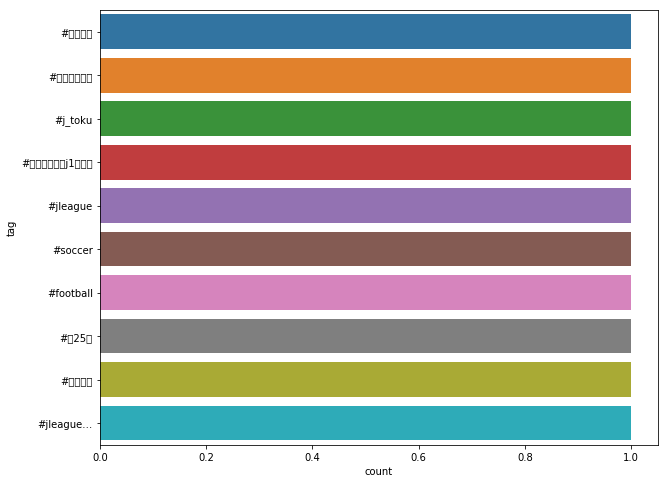

In [ ]:
count = 0
while count < 10:
    
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1

In [ ]:
ssc.stop()